# Scientific Visualization

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Introduction

Data visualization is one of the most important aspects of data analysis. Besides just producing **readable** plots, we should make an effort the improve the overall quality of the plots. 

`Matplotlib` is a powerful packafe for *Python* users.

Let's start with an example:

We first generate random sample data:

In [2]:
# Generate X-axis coordinate values
X = np.arange(10)

# Linear with added noise
y = 3*X + 2 + np.random.random(size=X.size)*2

# Print the data
print(X)
print(y)

[0 1 2 3 4 5 6 7 8 9]
[ 3.05033397  5.86289188  8.42425182 11.65384596 15.44297753 18.94416742
 21.30995091 23.87565475 26.63369949 30.00842588]


To plot a simple scatter plot, we can use the `plt.scatter()` function:

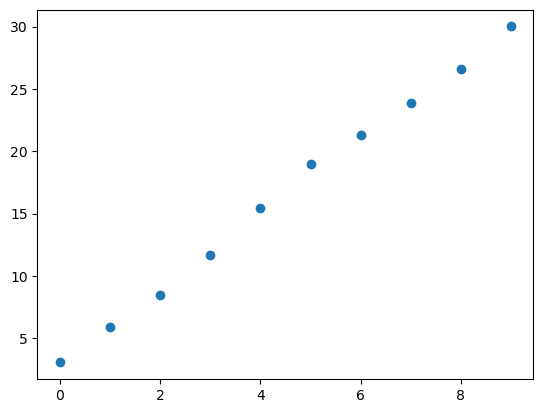

In [3]:
plt.scatter(X, y)

Let's try to make it better:

Text(0.5, 1.0, 'My First plot')

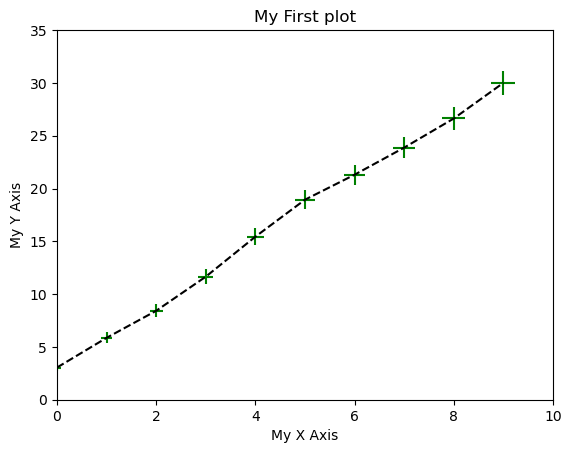

In [4]:
# Use `+` as a marker
# Color set as `g` (green)
# The point size is proportional to `Y` values
plt.scatter(X, y, marker="+", c="g", s=y*10)

# We add a line to the plot using `plt.plot()`
# Set the line style to dashed
# The color is set to `k` (black)
plt.plot(X, y, linestyle="dashed", color="k")

# Set the x/y axis limits
# The first two values are xlow and xhigh
# The last two values are ylow and yhigh
plt.axis([0, 10, 0, 35])

# Set the axes labels
plt.xlabel("My X Axis")
plt.ylabel("My Y Axis")

# Set the figure title
plt.title("My First plot")

### The Anatomy of a Figure

Before we go deeper, let's take a look at the structure of a figure in `matplotlib`:

<img width=700 src="https://matplotlib.org/_images/anatomy1.png">

As you can see, we have set values for many of the elements. There is no need to memorize them, though. We can always Google and find information on specific parts that we want to update.

### How to Build a Figure?

We recommend the following flow of defining and building a `matplotlib` figure:

1. Create a figure object (which contains all sub-plots).
2. Create the axes that control specific plots in the future.
3. Set the figure size.
4. Use the individual ax's to plot. 

Example:

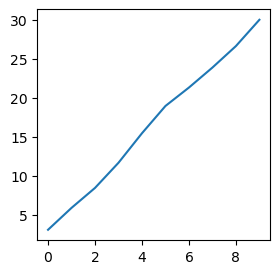

In [5]:
# `plt.subplots()` returns a figure object that contains the whole view
# .. it also returns `axes` that controls specific subplots in the figure
# Here, our "subplots" layout is by default 1 row and 1 col and therefore contains 1 plot
fig, ax = plt.subplots(figsize=(3, 3))

# We should plot on the `axis` object: ax
_ = ax.plot(X, y)

Let's reproduce the previous figure following the mentioned methodology:

Text(0.5, 1.0, 'My First Plot')

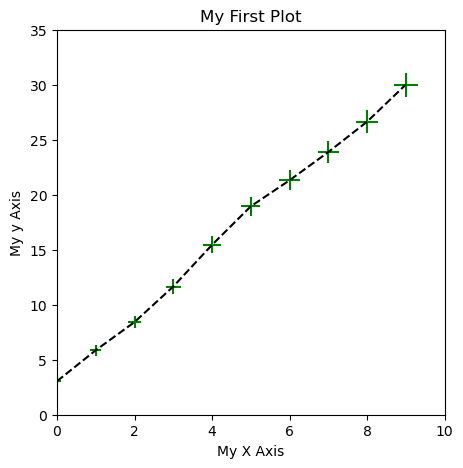

In [6]:
fig, ax = plt.subplots(figsize=(5, 5))

# Plot the markers
ax.scatter(X, y, marker="+", c="g", s=y*10)

# Plot the dashed line on the same subplot
ax.plot(X, y, linestyle="dashed", color="k")

# Set the extent of the axis
ax.axis([0, 10, 0, 35])

# Set the axis labels
ax.set_xlabel("My X Axis")
ax.set_ylabel("My y Axis")

# Set the title
ax.set_title("My First Plot")

This outlined methodology is especially useful when handling multiple plots in one figure.

Let's use an example of 4 plots using a 2 by 2 layout:

(2, 2)

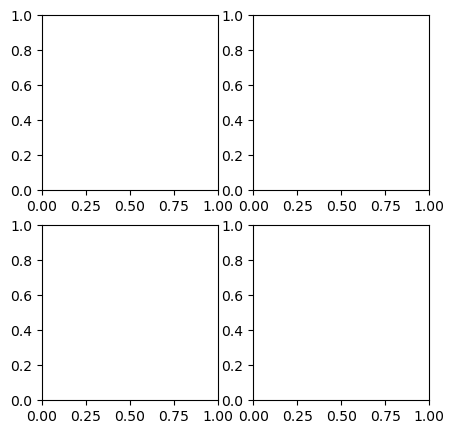

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(5,5))
axes.shape

We can plot in each of them by selecting the subplots of interest and using "plot()":

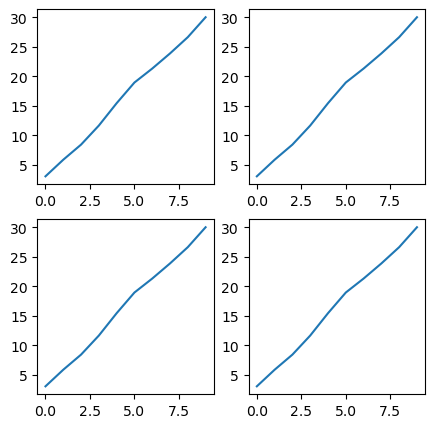

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(5,5))
for row in range(2):
    for col in range(2):
        axes[row][col].plot(X, y)

## Other Plot Types

### Histogram

Let's generate normally-distributed data to demonstrate:

In [9]:
mu, sig = 15, 1
arr = np.random.normal(mu, sig, size=10_000)
arr.shape, np.mean(arr), np.std(arr)

((10000,), 15.001020709134938, 1.011991337104882)

Let's plot the distribution as a histogram:

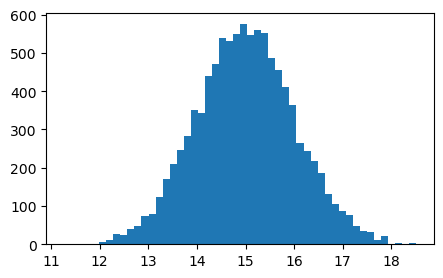

In [10]:
fig, ax = plt.subplots(figsize=(5,3))
_ = ax.hist(arr, bins=50)

We can customize the plot to make it better:

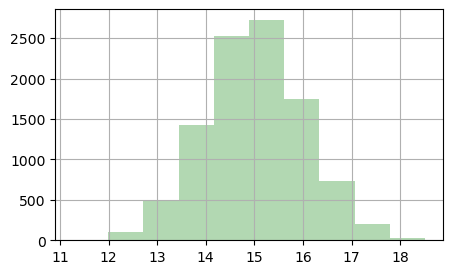

In [11]:
fig, ax = plt.subplots(figsize=(5, 3))
_ = ax.hist(arr, facecolor="g", alpha=.3)

# Add the grid
ax.grid()

### Boxplot

Instead of plotting a histogram, we can try a boxplot:

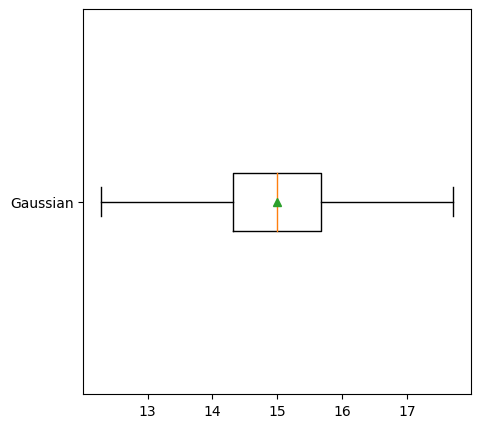

In [12]:
fig, ax = plt.subplots(figsize=(5,5))
_ = ax.boxplot(arr,
               vert=False,  # Verticle
               showfliers=False,  # Do no show outliers
               showmeans=True,  # Show the mean
               labels=["Gaussian"]  # Group name (label)
          )

### Bar chart

Let's generate random data for a bar chart:

In [13]:
bars = np.array(["Spring", "Summer", "Fall", "Winter"])

# Generate 4 random integers for the 4 categories
freq_arr = np.random.randint(0, 100, 4)
freq_arr

array([33, 43, 39, 34])

We can also add error values:

In [14]:
err_arr = np.random.randint(5, 10, 4)
err_arr

array([6, 8, 9, 6])

Finally, we plot category values and their errors:

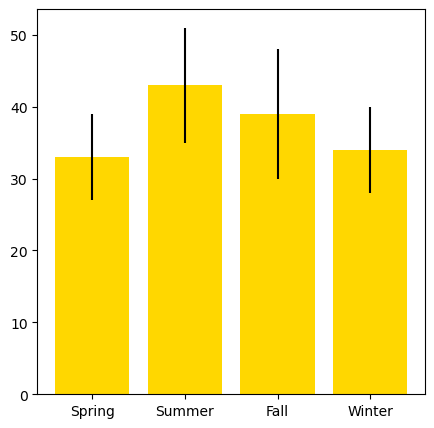

In [15]:
fig, ax = plt.subplots(figsize=(5,5))
_ = ax.bar(bars, freq_arr,  # X and Y
           yerr=err_arr,  # Error values
           color="gold")

### Group These Plots Together!

Text(0.5, 1.0, 'Bar chart')

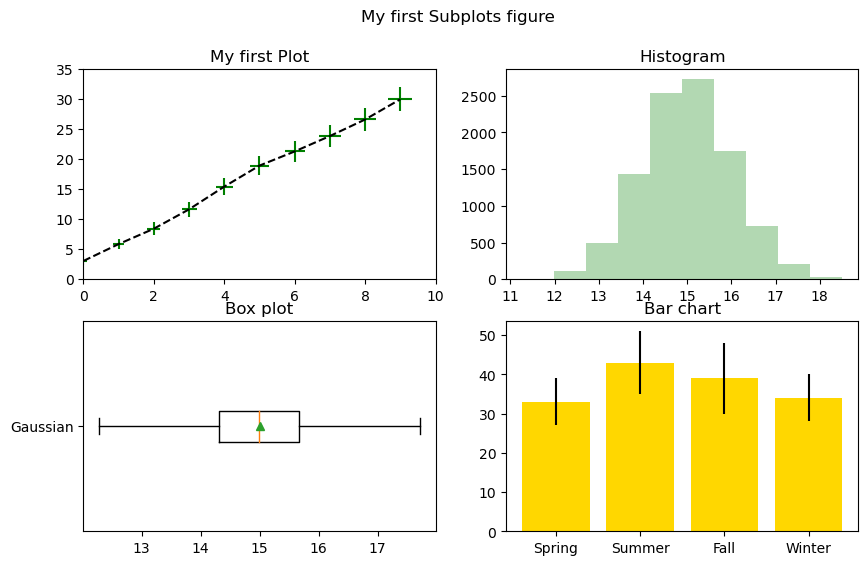

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6),
                         # Let their scales be different
                         sharex=False, sharey=False)

# Set the global title
fig.suptitle("My first Subplots figure")

# The first subplot
axes[0, 0].scatter(X, y, marker="+", c="g", s=y*10)
axes[0, 0].plot(X, y, linestyle="dashed", color="k")
axes[0, 0].axis([0, 10, 0, 35])
axes[0, 0].set_title("My first Plot")

# The second plot
axes[0, 1].hist(arr, facecolor="g", alpha=.3)
axes[0, 1].set_title("Histogram")

# The third plot
axes[1, 0].boxplot(arr, vert=False, showfliers=False, showmeans=True, labels=["Gaussian"])
axes[1, 0].set_title("Box plot")

# The fourth and last subplot
axes[1, 1].bar(bars, freq_arr, yerr=err_arr, color="gold")
axes[1, 1].set_title("Bar chart")

## Seaborn

Finally, we introduce [`seaborn`](https://seaborn.pydata.org/). This package helps a lot in producing good-looking plots for journal/conference submissions.

Let's demonstrate seaborn using two examples:

In [18]:
import seaborn as sns

#### Example 1: Heatmap

Let's use the example of a correlation matrix by loading the `iris` dataframe:

In [19]:
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Let's get the correlation between the first 3 columns:

In [20]:
corrs = df[df.columns[:3]].corr()
corrs

,sepal_length,sepal_width,petal_length
sepal_length,1.000000,-0.11757,0.871754
sepal_width,-0.117570,1.00000,-0.428440
petal_length,0.871754,-0.42844,1.000000


Plotting a headmap in `seaborn` is straightforward:

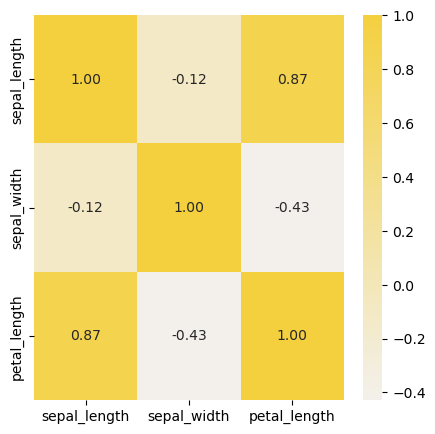

In [22]:
fig, ax = plt.subplots(figsize=(5,5))
_ = sns.heatmap(corrs,
                annot=True,  # Show the values
                fmt=".2f",  # Set the format of the values
                cmap=sns.light_palette("#F4D03F", as_cmap=True),  # Set the color map to be used.
                ax=ax # Set the used subplot by seaborn
           )

### Example 2: Linear regression

Using the same dataset, let's plot the bivariate regression between sepal length and width for different species:

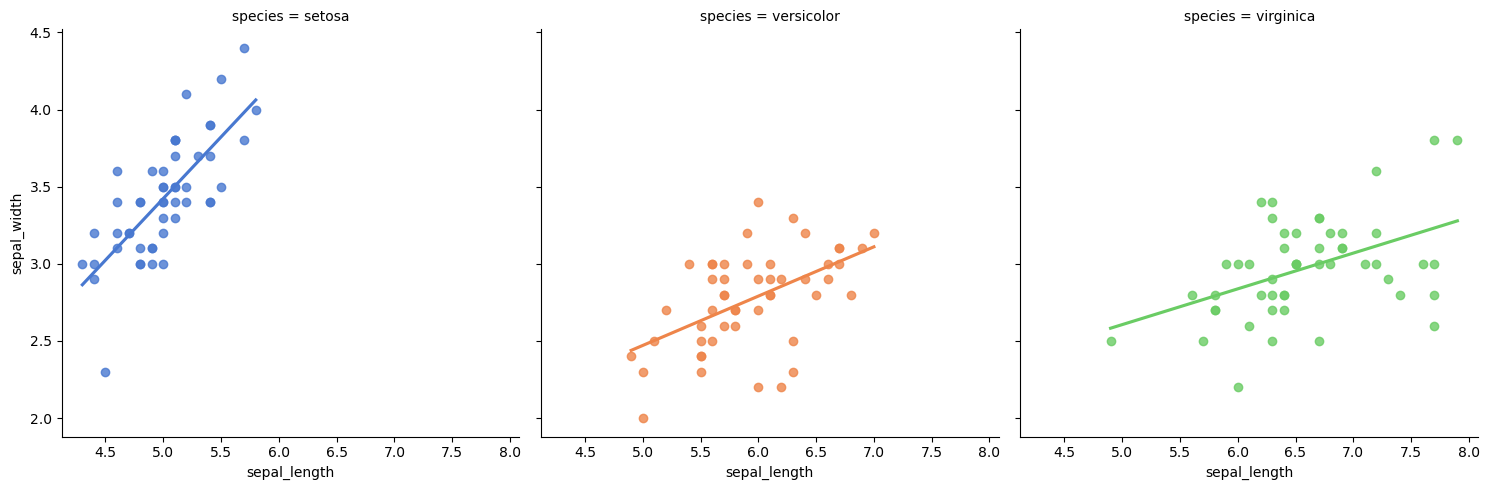

In [23]:
_ = sns.lmplot(
    x="sepal_length", y="sepal_width",
    data=df,  # The dataframe to be used
    col="species",  # Separate the subplots into columns using "species"
    hue="species",  # Set different colors for different species.
    col_wrap=3,  # Each figure row should have at maximum 3 subplots
    ci=None,  # Do not show confidence intervals
    palette="muted",  # Color pallet to use
)

# Resources

- https://matplotlib.org/users/pyplot_tutorial.html
- https://matplotlib.org/faq/usage_faq.html#parts-of-a-figure
- https://seaborn.pydata.org/examples/index.html

# Credit

[Zhiya Zuo](https://github.com/zhiyzuo)'s [python tutorials](https://github.com/zhiyzuo/python-tutorial).

---